# Capstone Project - The Battle of Neighborhoods

## Prospects of a Lunch Restaurant in Seoul, Korea.

## 1. Introduction/Business Problem

My friend wants to open a lunch restaurant in Seoul. He asked me for help.

I decided to help him by doing some analysis in the city of Seoul.
I offer three options:
+ Open a restaurant near major office buildings
+ Open fast food restaurants near the transport stations
+ Open a restaurant in places with few restaurants to avoid competition

Target Audiences:
+ People who want to open a restaurant like my friend or maybe a cafe, they can see the pros and cons of the locations.
+ Tourists looking for restaurants in Seoul.
+ Someone wants to understand a piece of data science work.

## 2. Data

I make use of https://en.wikipedia.org/wiki/List_of_districts_of_Seoul page to scrap the table to create a data-frame.

After that, I get coordinates of districts by using Geopy Client and prepare data.

I will first mark the locations of the districts with Foursquare and then give the next analysis.

In [1]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Seoul_explorer", timeout = 10)

**Using BeautifulSoup to find Table**

In [2]:
response_obj = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Seoul').text
soup = BeautifulSoup(response_obj,'lxml')
Districts_Seoul_Table = soup.find('table', {'class':'wikitable sortable'})
print(Districts_Seoul_Table.tr.text)


Name
Population
Area
Population density



**Saving the data what I need**

In [108]:
Name = []
Population =[]
Area = []
Popdensity = []

for tr in Districts_Seoul_Table.find_all('tr'):
    i = 0
    for tds in tr.find_all('td'):
        if i == 0:
            Name.append(tds.text[:-1])
        if i == 1:
            Population.append(tds.text[:-1])
        if i == 2:
            Area.append(tds.text[:-1])
        if i == 3:
            Popdensity.append(tds.text[:-1])
        i = i + 1

#A = np.column_stack((Name, Population, Area, Popdensity))
df = pd.DataFrame({"Name": Name, "Population": Population, "Area": Area, "Population_density": Popdensity})
df = df[:-1]
df.to_csv('Seoul.csv', index = False)

In [109]:
import pandas as pd
df = pd.read_csv('Seoul.csv')
df.head()

,Name,Population,Area,Population_density
0,Dobong-gu (도봉구; 道峰區),"355,712",20.70 km²,17184/km²
1,Dongdaemun-gu (동대문구; 東大門區),"376,319",14.21 km²,26483/km²
2,Dongjak-gu (동작구; 銅雀區),"419,261",16.35 km²,25643/km²
3,Eunpyeong-gu (은평구; 恩平區),"503,243",29.70 km²,16944/km²
4,Gangbuk-gu (강북구; 江北區),"338,410",23.60 km²,14339/km²


**Dropping Korean Character in Table**

In [110]:
df[['Name','Korean_language1', 'Korean_language2']] = df['Name'].str.split(' ',expand=True)
df.drop(['Korean_language1'], axis=1, inplace=True)
df.drop(['Korean_language2'], axis=1, inplace=True)
df.head()

,Name,Population,Area,Population_density
0,Dobong-gu,"355,712",20.70 km²,17184/km²
1,Dongdaemun-gu,"376,319",14.21 km²,26483/km²
2,Dongjak-gu,"419,261",16.35 km²,25643/km²
3,Eunpyeong-gu,"503,243",29.70 km²,16944/km²
4,Gangbuk-gu,"338,410",23.60 km²,14339/km²


**Getting coordinates of districts by using Geopy Client and saving**

In [111]:
Latitude = []
Longitude = []

for i in df['Name']:
    location = geolocator.geocode(i)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
    
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head()

df.to_csv('Seoul_co.csv', index = False)

In [112]:
df = pd.read_csv('Seoul_co.csv')

**Using Foursquare Location Data:**

In [8]:
import folium
address = 'Seoul'

Seloc = geolocator.geocode(address)
Seoul_latitude = Seloc.latitude
Seoul_longitude = Seloc.longitude
print('The geograpical coordinates of Seoul are {}, {}.'.format(Seoul_latitude, Seoul_longitude))

The geograpical coordinates of Seoul are 37.564982549999996, 126.93921080358436.


In [9]:
map_seoul = folium.Map(location=[Seoul_latitude, Seoul_longitude], zoom_start=11)
# add markers to map

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seoul)  

map_seoul

## 3. Visualization and Data Exploration:

### 3a. Open a restaurant near major office buildings

After finding information on the internet about the places where have major office building, I found 5 locations: Gangnam-gu, Jung-gu, Seocho-gu, Yeongdeungpo-gu, Yongsan-gu.

In [10]:
Districs_list = ['Gangnam-gu', 'Jung-gu', 'Seocho-gu', 'Yeongdeungpo-gu', 'Yongsan-gu']
Seoul_df_selected = df.loc[df['Name'].isin(Districs_list)]
Seoul_df_selected

,Name,Population,Area,Population_density,Latitude,Longitude
6,Gangnam-gu,"583,446",39.50 km²,14771/km²,37.517700,127.04730
13,Jung-gu,"136,227",9.96 km²,13677/km²,37.563656,126.99751
17,Seocho-gu,"454,288",47.00 km²,9666/km²,37.483500,127.03220
23,Yeongdeungpo-gu,"421,436",24.53 km²,17180/km²,37.526200,126.89590
24,Yongsan-gu,"249,914",21.87 km²,11427/km²,37.532300,126.99000


In [11]:
Seoul_center = geolocator.geocode('Yongsan-gu')
map_seoul = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12)
# add markers to map

for lat, lng, label in zip(Seoul_df_selected['Latitude'], Seoul_df_selected['Longitude'], Seoul_df_selected['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seoul)  

map_seoul

### Foursquare ID

In [12]:
CLIENT_ID = 'DT5JLPN4DLJ5HK3QW1F0GBS3MNHLSKIM4AOD2PJTF3YW2Z0V' # your Foursquare ID
CLIENT_SECRET = 'FVBF0QU5JZUOJZWAADJ5SEJL1NKLPMEVCCBKLYSOFDHFTRN5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DT5JLPN4DLJ5HK3QW1F0GBS3MNHLSKIM4AOD2PJTF3YW2Z0V
CLIENT_SECRET:FVBF0QU5JZUOJZWAADJ5SEJL1NKLPMEVCCBKLYSOFDHFTRN5


In [13]:
radius=1000
LIMIT=100

Category ID of Food

In [47]:
category = '4d4b7105d754a06374d81259'

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
Seoul_5_district_venues = getNearbyVenues(names=Seoul_df_selected['Name'], latitudes=Seoul_df_selected['Latitude'], longitudes=Seoul_df_selected['Longitude'])

Gangnam-gu
Jung-gu
Seocho-gu
Yeongdeungpo-gu
Yongsan-gu


In [48]:
map_Seoul_5_district = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Gangnam-gu', 'Jung-gu', 'Seocho-gu', 'Yeongdeungpo-gu', 'Yongsan-gu']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Seoul_5_district_venues['Venue Latitude'], 
                                  Seoul_5_district_venues['Venue Longitude'], 
                                  Seoul_5_district_venues['Venue Category'], 
                                  Seoul_5_district_venues['Neighbourhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_Seoul_5_district)

map_Seoul_5_district

In [49]:
print (Seoul_5_district_venues['Venue Category'].value_counts())

Korean Restaurant                37
BBQ Joint                        17
Café                             14
Bakery                           13
Noodle House                     12
Chinese Restaurant               10
Seafood Restaurant                7
Pizza Place                       6
Fried Chicken Joint               5
Vietnamese Restaurant             4
Dumpling Restaurant               4
Fast Food Restaurant              3
Restaurant                        3
Mexican Restaurant                3
Burger Joint                      3
Udon Restaurant                   2
Bunsik Restaurant                 2
Breakfast Spot                    2
Indian Restaurant                 2
Japanese Restaurant               2
Cantonese Restaurant              2
Sushi Restaurant                  2
Modern European Restaurant        2
Thai Restaurant                   2
Italian Restaurant                2
German Restaurant                 2
Asian Restaurant                  2
Sandwich Place              

In [50]:
Seoul_5d_restaurant_Top10 = Seoul_5_district_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Seoul_5d_restaurant_Top10 = Seoul_5d_restaurant_Top10.reset_index()

Seoul_5d_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Seoul_5d_restaurant_Top10

,Venue_Category,Frequency
0,Korean Restaurant,37
1,BBQ Joint,17
2,Café,14
3,Bakery,13
4,Noodle House,12
5,Chinese Restaurant,10
6,Seafood Restaurant,7
7,Pizza Place,6
8,Fried Chicken Joint,5
9,Vietnamese Restaurant,4


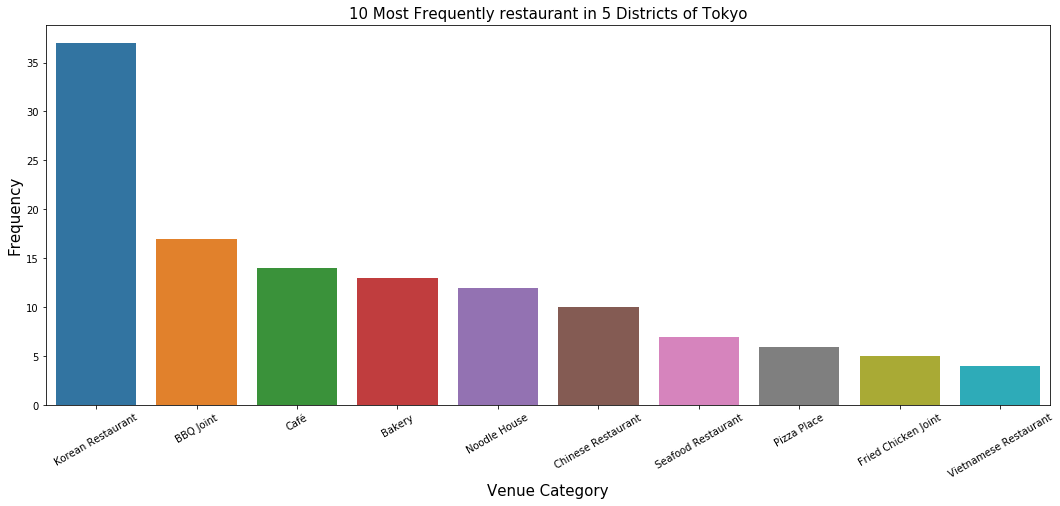

In [51]:
import seaborn as sns

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Seoul_5d_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)

plt.title('10 Most Frequently restaurant in 5 Districts of Seoul', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_restaurant.png", dpi=300)
plt.show()

In [53]:
# one hot encoding
Seoul_onehot = pd.get_dummies(Seoul_5_district_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Seoul_onehot['Neighbourhood'] = Seoul_5_district_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Seoul_onehot.columns[-1]] + list(Seoul_onehot.columns[:-1])
Seoul_onehot.head()

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bunsik Restaurant,...,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu


In [54]:
Seoul_grouped = Seoul_onehot.groupby('Neighbourhood').mean().reset_index()
Seoul_grouped

,Neighbourhood,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Gangnam-gu,0.000000,0.000000,0.000000,0.037037,0.0000,0.148148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000
1,Jung-gu,0.000000,0.000000,0.046512,0.023256,0.0000,0.139535,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Seocho-gu,0.000000,0.000000,0.000000,0.222222,0.0000,0.037037,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
3,Yeongdeungpo-gu,0.000000,0.000000,0.000000,0.125000,0.0625,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Yongsan-gu,0.012658,0.012658,0.000000,0.088608,0.0000,0.025316,0.012658,0.012658,0.025316,...,0.012658,0.012658,0.012658,0.012658,0.025316,0.012658,0.000000,0.012658,0.037975,0.012658


In [55]:
num_top_venues = 5

for hood in Seoul_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Seoul_grouped[Seoul_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Gangnam-gu----
                venue  freq
0   Korean Restaurant  0.19
1              Bakery  0.15
2  Chinese Restaurant  0.11
3        Noodle House  0.11
4                Café  0.07


----Jung-gu----
                venue  freq
0   Korean Restaurant  0.35
1              Bakery  0.14
2        Noodle House  0.14
3  Italian Restaurant  0.05
4    Asian Restaurant  0.05


----Seocho-gu----
                   venue  freq
0      Korean Restaurant  0.22
1              BBQ Joint  0.22
2     Seafood Restaurant  0.11
3     Chinese Restaurant  0.07
4  Vietnamese Restaurant  0.04


----Yeongdeungpo-gu----
                venue  freq
0                Café  0.19
1   Korean Restaurant  0.19
2  Seafood Restaurant  0.12
3           BBQ Joint  0.12
4  Chinese Restaurant  0.12


----Yongsan-gu----
                   venue  freq
0                   Café  0.11
1      Korean Restaurant  0.10
2              BBQ Joint  0.09
3    Dumpling Restaurant  0.05
4  Vietnamese Restaurant  0.04




In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Seoul_grouped['Neighbourhood']

for ind in np.arange(Seoul_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Seoul_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gangnam-gu,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Modern European Restaurant,Café,Udon Restaurant,BBQ Joint,Snack Place,Samgyetang Restaurant
1,Jung-gu,Korean Restaurant,Noodle House,Bakery,Asian Restaurant,Italian Restaurant,Fried Chicken Joint,Indian Restaurant,Pizza Place,Restaurant,Sandwich Place
2,Seocho-gu,Korean Restaurant,BBQ Joint,Seafood Restaurant,Chinese Restaurant,Noodle House,Pizza Place,Restaurant,German Restaurant,Burger Joint,Fried Chicken Joint
3,Yeongdeungpo-gu,Café,Korean Restaurant,Chinese Restaurant,BBQ Joint,Seafood Restaurant,Bagel Shop,Japanese Restaurant,Food Court,Sushi Restaurant,Fried Chicken Joint
4,Yongsan-gu,Café,Korean Restaurant,BBQ Joint,Dumpling Restaurant,Pizza Place,Vietnamese Restaurant,Mexican Restaurant,Noodle House,Chinese Restaurant,Breakfast Spot


In [58]:
# set number of clusters
kclusters = 5

Seoul_grouped_clustering = Seoul_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Seoul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_)

Check the 5 Cluster labels : [3 2 1 4 0]


In [59]:
Seoul_grouped_clustering

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bunsik Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0.000000,0.000000,0.000000,0.037037,0.0000,0.148148,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.046512,0.023256,0.0000,0.139535,0.000000,0.000000,0.000000,0.023256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.222222,0.0000,0.037037,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
3,0.000000,0.000000,0.000000,0.125000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012658,0.012658,0.000000,0.088608,0.0000,0.025316,0.012658,0.012658,0.025316,0.000000,...,0.012658,0.012658,0.012658,0.012658,0.025316,0.012658,0.000000,0.012658,0.037975,0.012658


In [62]:
# add clustering labels

Seoul_df_selected.insert(0, 'Cluster Label', kmeans.labels_)

Seoul_merged = Seoul_df_selected
Seoul_merged = Seoul_merged.rename(columns={"Name": "Neighbourhood"})
Seoul_merged = Seoul_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Neighbourhood')
#neighbourhoods_venues_sorted.head()
Seoul_merged.head()

,Cluster Label,Neighbourhood,Population,Area,Population_density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,3,Gangnam-gu,"583,446",39.50 km²,14771/km²,37.517700,127.04730,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Modern European Restaurant,Café,Udon Restaurant,BBQ Joint,Snack Place,Samgyetang Restaurant
13,2,Jung-gu,"136,227",9.96 km²,13677/km²,37.563656,126.99751,Korean Restaurant,Noodle House,Bakery,Asian Restaurant,Italian Restaurant,Fried Chicken Joint,Indian Restaurant,Pizza Place,Restaurant,Sandwich Place
17,1,Seocho-gu,"454,288",47.00 km²,9666/km²,37.483500,127.03220,Korean Restaurant,BBQ Joint,Seafood Restaurant,Chinese Restaurant,Noodle House,Pizza Place,Restaurant,German Restaurant,Burger Joint,Fried Chicken Joint
23,4,Yeongdeungpo-gu,"421,436",24.53 km²,17180/km²,37.526200,126.89590,Café,Korean Restaurant,Chinese Restaurant,BBQ Joint,Seafood Restaurant,Bagel Shop,Japanese Restaurant,Food Court,Sushi Restaurant,Fried Chicken Joint
24,0,Yongsan-gu,"249,914",21.87 km²,11427/km²,37.532300,126.99000,Café,Korean Restaurant,BBQ Joint,Dumpling Restaurant,Pizza Place,Vietnamese Restaurant,Mexican Restaurant,Noodle House,Chinese Restaurant,Breakfast Spot


In [63]:
map_restaurants10 = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Seoul_df_selected['Latitude'], 
                                  Seoul_df_selected['Longitude'], 
                                  Seoul_df_selected['Name'], 
                                  Seoul_df_selected['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [64]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 0, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Yongsan-gu,Café,Korean Restaurant,BBQ Joint,Dumpling Restaurant,Pizza Place,Vietnamese Restaurant,Mexican Restaurant,Noodle House,Chinese Restaurant,Breakfast Spot


In [65]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 1, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Seocho-gu,Korean Restaurant,BBQ Joint,Seafood Restaurant,Chinese Restaurant,Noodle House,Pizza Place,Restaurant,German Restaurant,Burger Joint,Fried Chicken Joint


In [66]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 2, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Jung-gu,Korean Restaurant,Noodle House,Bakery,Asian Restaurant,Italian Restaurant,Fried Chicken Joint,Indian Restaurant,Pizza Place,Restaurant,Sandwich Place


In [67]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 3, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Gangnam-gu,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Modern European Restaurant,Café,Udon Restaurant,BBQ Joint,Snack Place,Samgyetang Restaurant


In [68]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 4, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Yeongdeungpo-gu,Café,Korean Restaurant,Chinese Restaurant,BBQ Joint,Seafood Restaurant,Bagel Shop,Japanese Restaurant,Food Court,Sushi Restaurant,Fried Chicken Joint


## 3b. Open fast food restaurants near the transport stations

In [72]:
category = '4d4b7105d754a06379d81259'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Seoul_transport = getNearbyVenues(names=df['Name'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Dobong-gu
Dongdaemun-gu
Dongjak-gu
Eunpyeong-gu
Gangbuk-gu
Gangdong-gu
Gangnam-gu
Gangseo-gu
Geumcheon-gu
Guro-gu
Gwanak-gu
Gwangjin-gu
Jongno-gu
Jung-gu
Jungnang-gu
Mapo-gu
Nowon-gu
Seocho-gu
Seodaemun-gu
Seongbuk-gu
Seongdong-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu
Seoul


In [74]:
print(Seoul_transport['Venue Category'].value_counts())

Bus Stop                    115
Hotel                        39
Intersection                 31
Metro Station                22
Bus Station                  15
Hostel                       12
Rental Car Location           7
Bed & Breakfast               2
Travel & Transport            1
Bike Rental / Bike Share      1
Motel                         1
Duty-free Shop                1
Name: Venue Category, dtype: int64


In [128]:
Seoul_transport = Seoul_transport[Seoul_transport['Venue Category'].str.contains('Bus')]
print(Seoul_transport['Neighbourhood'].value_counts())

Seocho-gu          13
Gwanak-gu          11
Yongsan-gu         10
Dongjak-gu          8
Gangnam-gu          8
Seongbuk-gu         8
Seongdong-gu        7
Songpa-gu           6
Jung-gu             6
Gangbuk-gu          5
Dongdaemun-gu       4
Eunpyeong-gu        4
Nowon-gu            4
Gwangjin-gu         4
Seoul               3
Gangdong-gu         3
Jongno-gu           3
Mapo-gu             2
Yeongdeungpo-gu     2
Geumcheon-gu        1
Jungnang-gu         1
Seodaemun-gu        1
Gangseo-gu          1
Name: Neighbourhood, dtype: int64


         Name  Frequency
0   Seocho-gu         13
1   Gwanak-gu         11
2  Yongsan-gu         10
3  Dongjak-gu          8
4  Gangnam-gu          8


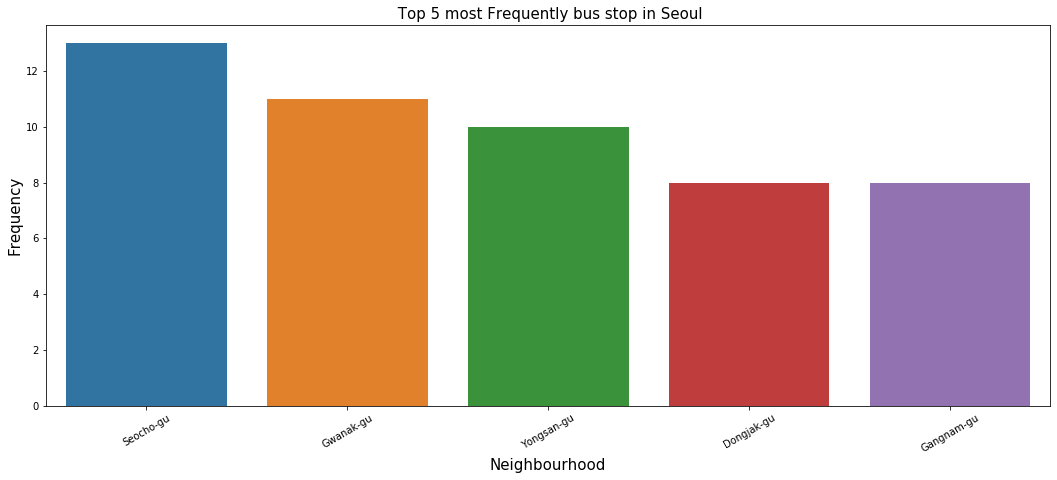

In [133]:
Seoul_transport_Top5 = Seoul_transport['Neighbourhood'].value_counts()[0:5].to_frame(name='frequency')
Seoul_transport_Top5 = Seoul_transport_Top5.reset_index()

Seoul_transport_Top5.rename(index=str, columns={"index": "Name", "frequency": "Frequency"}, inplace=True)

print(Seoul_transport_Top5)

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x='Name', y='Frequency', data=Seoul_transport_Top5)
s.set_xticklabels(s.get_xticklabels(), rotation=30)

plt.title(' Top 5 most Frequently bus stop in Seoul', fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_bus.png", dpi=300)
plt.show()

In [139]:
Districts = ['Seocho-gu', 'Gwanak-gu', 'Yongsan-gu', 'Dongjak-gu', 'Gangnam-gu']
Seoul_transport_Top5 = Seoul_transport.loc[Seoul_transport['Neighbourhood'].isin(Districts)]
Seoul_transport_Top5

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Dongjak-gu,37.5121,126.9395,노량진 수산시장 (ID: 20-009) (노량진수산시장.CTS기독교TV),37.513388,126.938460,Bus Stop
11,Dongjak-gu,37.5121,126.9395,동작구청 정문 (ID: 20-240),37.512466,126.940091,Bus Stop
12,Dongjak-gu,37.5121,126.9395,"노량진수산시장,CTS기독교TV (ID: 20-010)",37.513526,126.938839,Bus Stop
13,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-114) (노량진역),37.513518,126.941875,Bus Stop
14,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-837),37.514073,126.941698,Bus Stop
16,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-115),37.513753,126.943545,Bus Stop
17,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-011) (노량진역),37.513736,126.943925,Bus Stop
18,Dongjak-gu,37.5121,126.9395,노량진역 (20-012) (노량진역),37.513904,126.944618,Bus Stop
43,Gangnam-gu,37.5177,127.0473,강남구청강남세무서 (ID: 23-176) (강남구청.강남세무서),37.518347,127.047196,Bus Stop
45,Gangnam-gu,37.5177,127.0473,청담역 (ID: 23-207) / 공항버스 정류장 (청담역),37.517769,127.050730,Bus Stop


In [141]:
map_transport = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Seocho-gu', 'Gwanak-gu', 'Yongsan-gu', 'Dongjak-gu', 'Gangnam-gu']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, distr in zip(Seoul_transport_Top5['Venue Latitude'], 
                                  Seoul_transport_Top5['Venue Longitude'], 
                                  Seoul_transport_Top5['Neighbourhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_transport)

map_transport

In [124]:
# one hot encoding
Seoul_transport_onehot = pd.get_dummies(Seoul_transport[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Seoul_transport_onehot['Neighbourhood'] = Seoul_transport['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Seoul_transport_onehot.columns[-1]] + list(Seoul_transport_onehot.columns[:-1])
Seoul_transport_onehot.head()

,Bus Stop,Neighbourhood
3,1,Dongdaemun-gu
5,1,Dongdaemun-gu
6,1,Dongdaemun-gu
7,1,Dongdaemun-gu
10,1,Dongjak-gu


In [125]:
Seoul_transport_grouped = Seoul_transport_onehot.groupby('Neighbourhood').mean().reset_index()
Seoul_transport_grouped

,Neighbourhood,Bus Stop
0,Dongdaemun-gu,1
1,Dongjak-gu,1
2,Eunpyeong-gu,1
3,Gangbuk-gu,1
4,Gangdong-gu,1
5,Gangnam-gu,1
6,Gangseo-gu,1
7,Geumcheon-gu,1
8,Gwanak-gu,1
9,Gwangjin-gu,1


In [126]:
# set number of clusters
kclusters = 4

Seoul__transport_grouped_clustering = Seoul_transport_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Seoul__transport_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_)

Check the 5 Cluster labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


D:\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


In [113]:
df = df[1:]

In [118]:
# add clustering labels

#df.insert(0, 'Cluster Label', kmeans.labels_)


#neighbourhoods_venues_sorted.head()
df

,Cluster Label,Name,Population,Area,Population_density,Latitude,Longitude
1,1,Dongdaemun-gu,"376,319",14.21 km²,26483/km²,37.574200,127.039500
2,3,Dongjak-gu,"419,261",16.35 km²,25643/km²,37.512100,126.939500
3,1,Eunpyeong-gu,"503,243",29.70 km²,16944/km²,37.602400,126.929300
4,3,Gangbuk-gu,"338,410",23.60 km²,14339/km²,37.639500,127.025500
5,0,Gangdong-gu,"481,332",24.59 km²,19574/km²,37.530000,127.123700
6,3,Gangnam-gu,"583,446",39.50 km²,14771/km²,37.517700,127.047300
7,1,Gangseo-gu,"591,653",41.43 km²,14281/km²,37.550900,126.849700
8,0,Geumcheon-gu,"258,030",13.02 km²,19818/km²,37.456500,126.895400
9,1,Guro-gu,"457,131",20.12 km²,22720/km²,37.495200,126.887700
10,3,Gwanak-gu,"531,960",29.57 km²,17990/km²,37.478200,126.951800


In [116]:
map_transport = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(df['Latitude'], 
                                  df['Longitude'], 
                                  df['Name'], 
                                  df['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_transport)
       
map_transport

In [119]:
df.loc[df['Cluster Label'] == 0]

,Cluster Label,Name,Population,Area,Population_density,Latitude,Longitude
5,0,Gangdong-gu,"481,332",24.59 km²,19574/km²,37.530000,127.12370
8,0,Geumcheon-gu,"258,030",13.02 km²,19818/km²,37.456500,126.89540
13,0,Jung-gu,"136,227",9.96 km²,13677/km²,37.563656,126.99751
17,0,Seocho-gu,"454,288",47.00 km²,9666/km²,37.483500,127.03220


In [122]:
print(Seoul_transport['Neighbourhood'].value_counts())

Seocho-gu          16
Gwanak-gu          11
Yongsan-gu         10
Dongjak-gu          9
Gangnam-gu          9
Seongbuk-gu         8
Seongdong-gu        7
Jung-gu             6
Gangdong-gu         6
Gangbuk-gu          6
Songpa-gu           6
Gwangjin-gu         5
Eunpyeong-gu        4
Nowon-gu            4
Dongdaemun-gu       4
Seoul               4
Jongno-gu           3
Jungnang-gu         2
Geumcheon-gu        2
Mapo-gu             2
Seodaemun-gu        2
Yeongdeungpo-gu     2
Yangcheon-gu        1
Gangseo-gu          1
Name: Neighbourhood, dtype: int64


In [120]:
df.loc[df['Cluster Label'] == 1]

,Cluster Label,Name,Population,Area,Population_density,Latitude,Longitude
1,1,Dongdaemun-gu,"376,319",14.21 km²,26483/km²,37.574200,127.039500
3,1,Eunpyeong-gu,"503,243",29.70 km²,16944/km²,37.602400,126.929300
7,1,Gangseo-gu,"591,653",41.43 km²,14281/km²,37.550900,126.849700
9,1,Guro-gu,"457,131",20.12 km²,22720/km²,37.495200,126.887700
11,1,Gwangjin-gu,"377,375",17.06 km²,22120/km²,37.538400,127.082800
12,1,Jongno-gu,"165,344",23.91 km²,6915/km²,37.580310,126.983079
14,1,Jungnang-gu,"423,411",18.50 km²,22887/km²,37.606300,127.093000
15,1,Mapo-gu,"395,830",23.84 km²,16604/km²,37.566571,126.901532
18,1,Seodaemun-gu,"320,861",17.61 km²,18220/km²,37.579075,126.936786
19,1,Seongbuk-gu,"475,961",24.58 km²,19364/km²,37.590000,127.016500
